# <span style="color:purple">Basic_Session_8차시_통계분석 II</span>

In [1]:
import pandas as pd
import numpy as np
#from scipy.stats import trim_mean
#from statsmodels import robust
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
import seaborn as sns

# 상관분석

#### 상관관계 
- 한 변수가 큰 값을 가질 때 다른 변수도 큰 값을 갖는가? (양의 상관관계) 
- 아니면 오히려 작은 값을 갖는가? (음의 상관관계) 
- 아니면 아무런 관계가 없는가? (상관관계 없음) 

#### 공분산 (Covariance)

$$ cov(x,y)=\frac{\sum_i (x_i- \bar x) (y_i - \bar y )}{n-1} $$

- 두 변수가 같은 방향으로 움직이는 정도를 측정
- 측정단위에 영향을 받음 (kg vs g, km vs mile)

#### Pearson 상관계수 (correlation coefficient)
$$cor(x,y)= \frac{cov(x,y)}{sd(x)sd(y)}$$
- 표준편차로 나누어 주어 언제나 -1과 1 사이의 값을 가진다.




## 1. 피어슨, 스피어만, 켄달 상관계수

In [2]:
# 데이터 생성
x1 = np.random.random(100)
x2 = np.random.random(100)

# 피어슨 상관계수
print(stats.pearsonr(x1,x2), '\n')
# 출력값에서 처음 나오는 값은 상관계수를 의미하고 두번째 값은 상관분석에 따른 pvalue를 의미함

# 스피어만 상관계수
print(stats.spearmanr(x1,x2), '\n')
# 출력값에서 처음 나오는 값은 상관계수를 의미하고 두번째 값은 상관분석에 따른 pvalue를 의미함

# 켄달 상관계수
print(stats.kendalltau(x1,x2))
# 출력값에서 처음 나오는 값은 상관계수를 의미하고 두번째 값은 상관분석에 따른 pvalue를 의미함

(0.2085588078295432, 0.037312877511291365) 

SpearmanrResult(correlation=0.2147254725472547, pvalue=0.03192491965350525) 

KendalltauResult(correlation=0.14262626262626263, pvalue=0.035505085008817376)


## 2. 보스턴 데이터 활용

In [3]:
#주택 가격 데이터 활용한 지역의 평균 주택 가격 예측
df= pd.read_csv('boston.csv')
df.head()

,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CMEDV    506 non-null    float64
 1   CRIM     506 non-null    float64
 2   ZN       506 non-null    float64
 3   INDUS    506 non-null    float64
 4   CHAS     506 non-null    int64  
 5   NOX      506 non-null    float64
 6   RM       506 non-null    float64
 7   AGE      506 non-null    float64
 8   DIS      506 non-null    float64
 9   RAD      506 non-null    int64  
 10  TAX      506 non-null    int64  
 11  PTRATIO  506 non-null    float64
 12  B        506 non-null    float64
 13  LSTAT    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


TOWN: 소속 도시 이름

LON, LAT: 해당 지역의 경도(Longitudes) 위도(Latitudes) 정보

CMEDV: 해당 지역의 주택 가격 (중앙값) (corrected median values of housing in USD 1000)

CRIM: 지역 범죄율 (per capita crime)

ZN: 소속 도시에 25,000 제곱 피트(sq.ft) 이상의 주택지 비율

INDUS: 소속 도시에 상업적 비즈니스에 활용되지 않는 농지 면적

CHAS: 해당 지역이 Charles 강과 접하고 있는지 여부 (dummy variable)

NOX: 소속 도시의 산화질소 농도

RM: 해당 지역의 자택당 평균 방 갯수

AGE: 해당 지역에 1940년 이전에 건설된 주택의 비율

DIS: 5개의 보스턴 고용 센터와의 거리에 따른 가중치 부여

RAD: 소속 도시가 Radial 고속도로와의 접근성 지수

TAX: 소속 도시의 10000달러당 재산세

PTRATIO: 소속 도시의 학생-교사 비율

B: 해당 지역의 흑인 지수 (1000(Bk - 0.63)^2), Bk는 흑인의 비율

LSTAT: 해당 지역의 빈곤층 비율

### 종속 변수: CMEDV

In [5]:
df['CMEDV']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    19.0
Name: CMEDV, Length: 506, dtype: float64

## 설명변수와 종속변수 간의 관계 탐색  

### 변수 간의 상관계수 파악

In [6]:
# Person 상관계수
cols = ['CMEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

corr = df[df.columns].corr(method = 'pearson')
corr

,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CMEDV,1.000000,-0.389582,0.360386,-0.484754,0.175663,-0.429302,0.696304,-0.377999,0.249315,-0.384766,-0.471979,-0.505655,0.334861,-0.740836
CRIM,-0.389582,1.000000,-0.200469,0.406583,-0.055892,0.420971,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,0.360386,-0.200469,1.000000,-0.533828,-0.042697,-0.516612,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.484754,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175663,-0.055892,-0.042697,0.062938,1.000000,0.091208,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.429302,0.420971,-0.516612,0.763651,0.091208,1.000000,-0.302191,0.731467,-0.769232,0.611439,0.668022,0.188926,-0.380051,0.590877
RM,0.696304,-0.219247,0.311991,-0.391676,0.091251,-0.302191,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.377999,0.352734,-0.569537,0.644779,0.086518,0.731467,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249315,-0.379670,0.664408,-0.708027,-0.099176,-0.769232,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.384766,0.625505,-0.311948,0.595129,-0.007368,0.611439,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


In [7]:
print(stats.pearsonr(df['CMEDV'],df['CRIM']), '\n')

(-0.3895824406644484, 8.711542149482747e-20) 



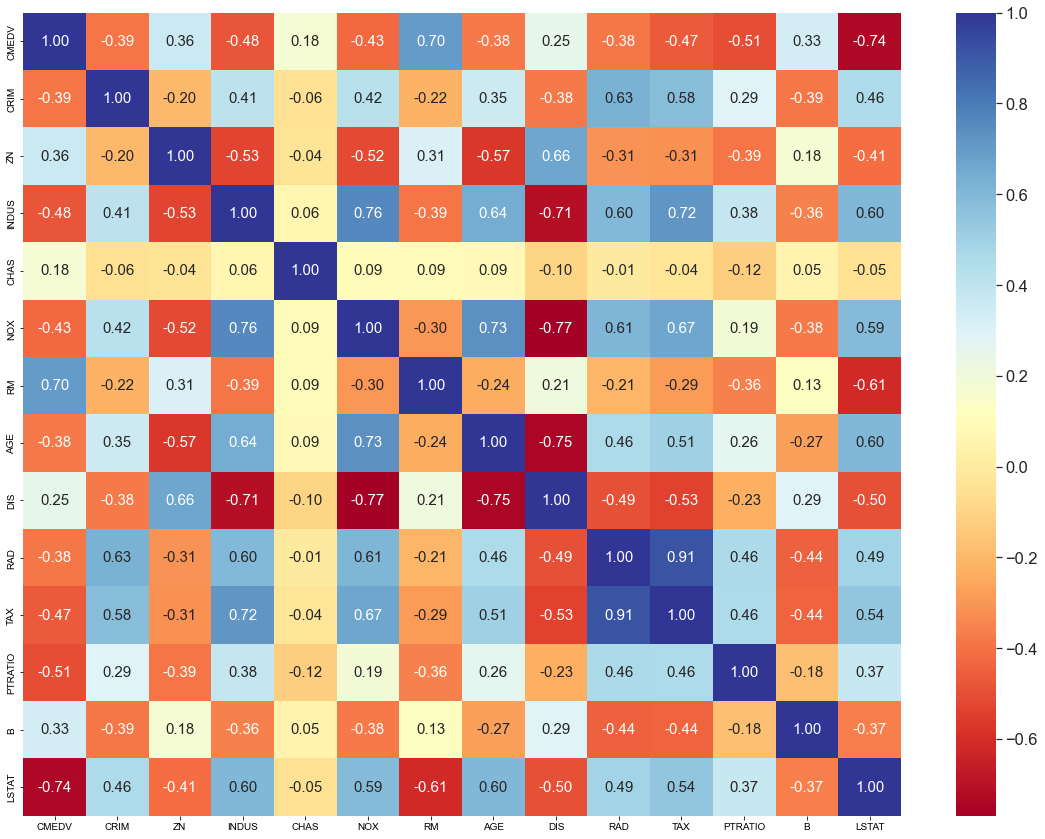

In [8]:
# heatmap (seaborn)
fig = plt.figure(figsize = (16, 12))
ax = fig.gca()

sns.set(font_scale = 1.5)  # heatmap 안의 font-size 설정
heatmap = sns.heatmap(corr.values, annot = True, fmt='.2f', annot_kws={'size':15},
                      yticklabels = cols, xticklabels = cols, ax=ax, cmap = "RdYlBu")
plt.tight_layout()
plt.show()

주택가격(y)와의 상관관계 파악한 결과, RM(자택당 평균 방 갯수) 및 LSTAT(빈곤층의 비율)과 강한 상관관계를 보임  

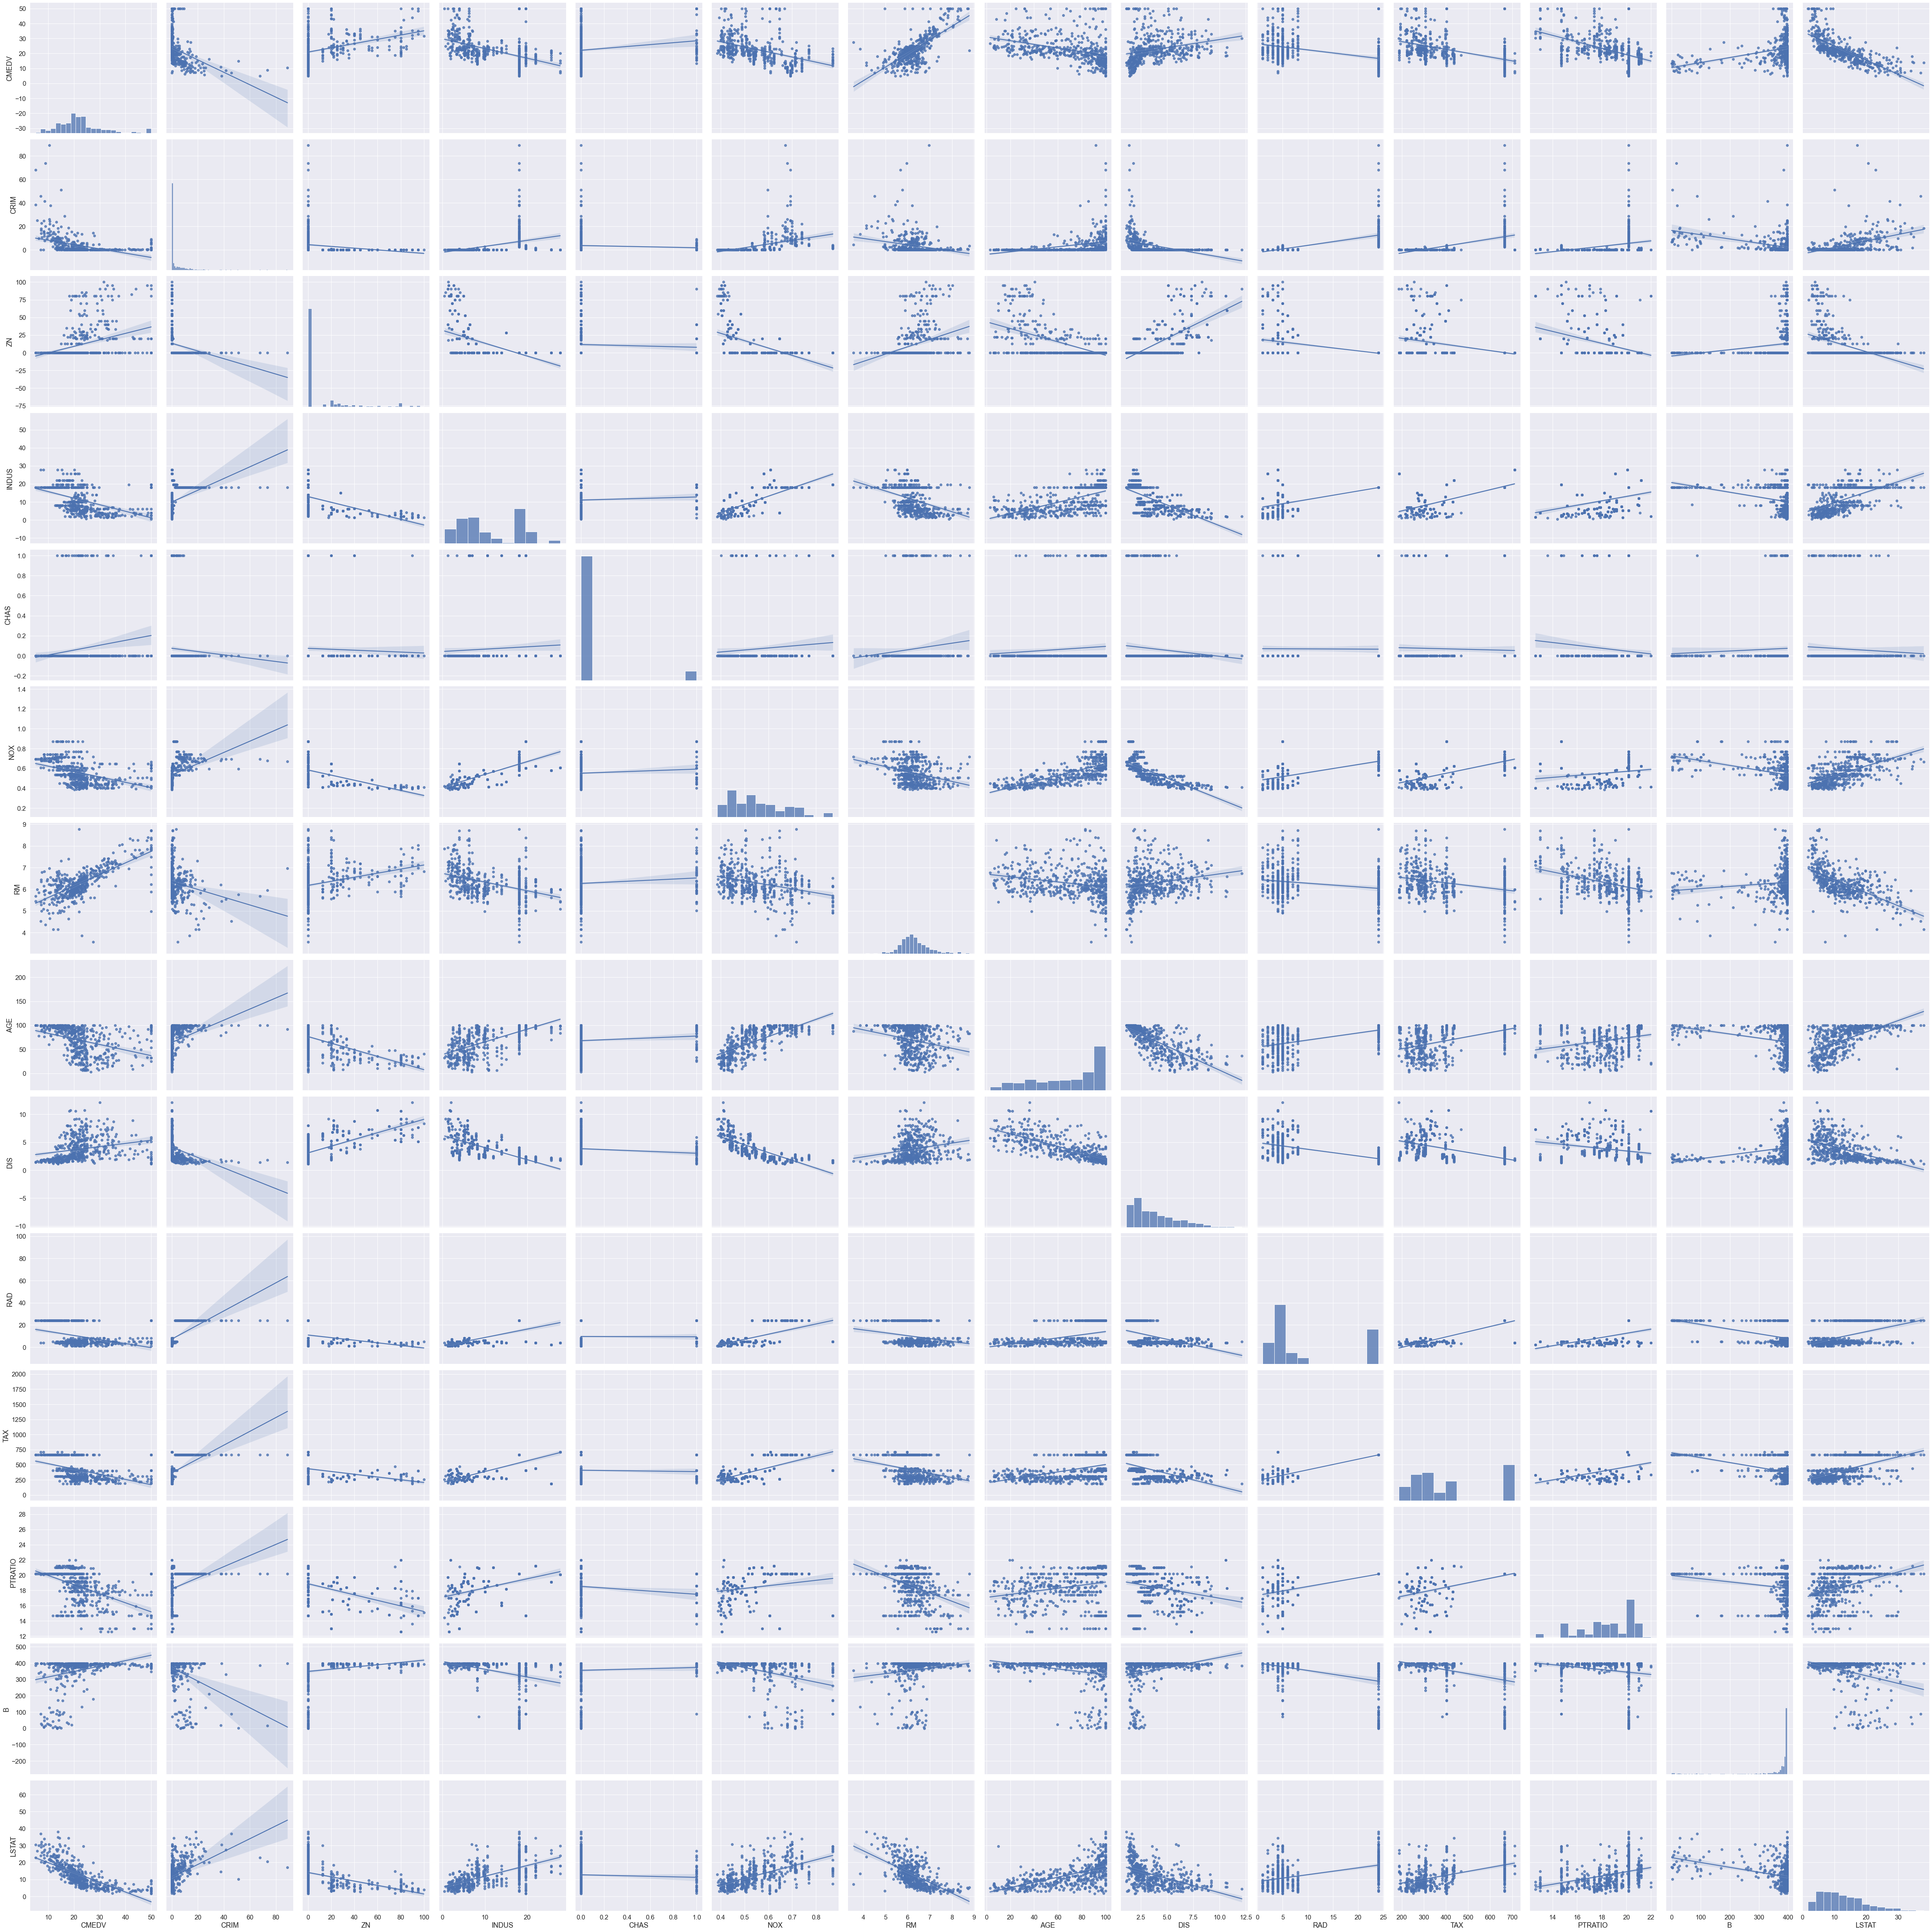

In [9]:
sns.pairplot(df, kind="reg", height=5)

## scatter plot 시각화

- 주택 가격 ( “CMEDV” ) ~ 방 갯수 ( “RM” )

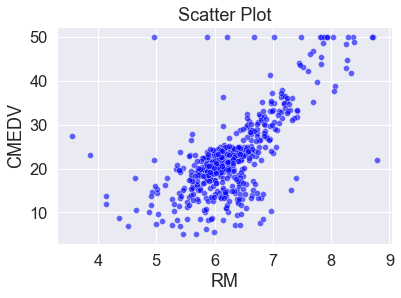

In [10]:
# scatter plot
sns.scatterplot(data=df, x='RM', y='CMEDV', markers='o', color='blue',alpha=0.6)
plt.title('Scatter Plot')
plt.show()

주택 가격이 방 갯수와 양의 상관관계(positive correlation)를 갖고 있음.  
즉, 방 갯수가 많은 주택들이 상대적으로 더 높은 가격을 갖고 있다고 파악 가능

- 주택가격(CMEDV) ~ 빈곤층의 비율(LSTAT)

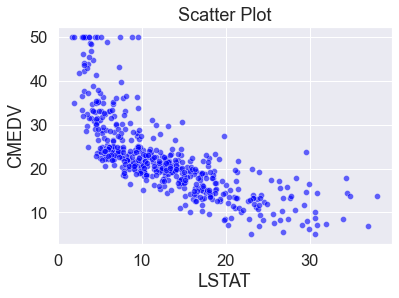

In [11]:
# scatter plot
sns.scatterplot(data=df, x='LSTAT', y='CMEDV', markers='o', color='blue', alpha=0.6)
plt.title('Scatter Plot')
plt.show()

주택 가격이 빈곤층의 비율과 음의 상관관계(negative correlation)를 갖고 있음.  
빈곤층의 비율이 높은 지역의 주택 가격이 상대적으로 낮은 경향이 있음

# 간단한 실습  

### 광고에 어떤 매체를 얼마나 투자했을 때 판매량의 영향력은 어떻게 될 것인가

In [14]:
adv= pd.read_csv('Advertising.csv')

In [29]:
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## 종속변수?

## 독립변수?

## heatmap 및 pairplot 찍어보고 결과 해석하기

In [22]:
# Person 상관계수
corr = adv[adv.columns].corr(method = 'pearson')
corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


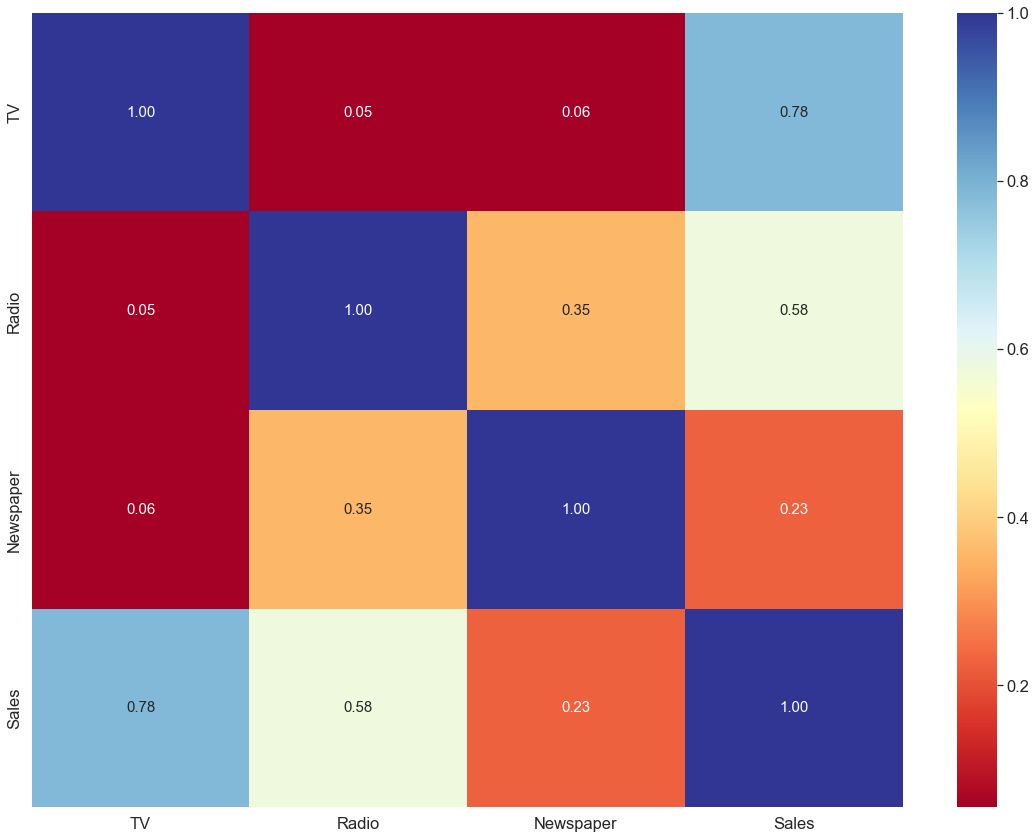

In [25]:
# heatmap (seaborn)
fig = plt.figure(figsize = (16, 12))
ax = fig.gca()

sns.set(font_scale = 1.5)  # heatmap 안의 font-size 설정
heatmap = sns.heatmap(corr.values, annot = True, fmt='.2f', annot_kws={'size':15},
                      yticklabels = adv.columns, xticklabels = adv.columns, ax=ax, cmap = "RdYlBu")
plt.tight_layout()
plt.show()

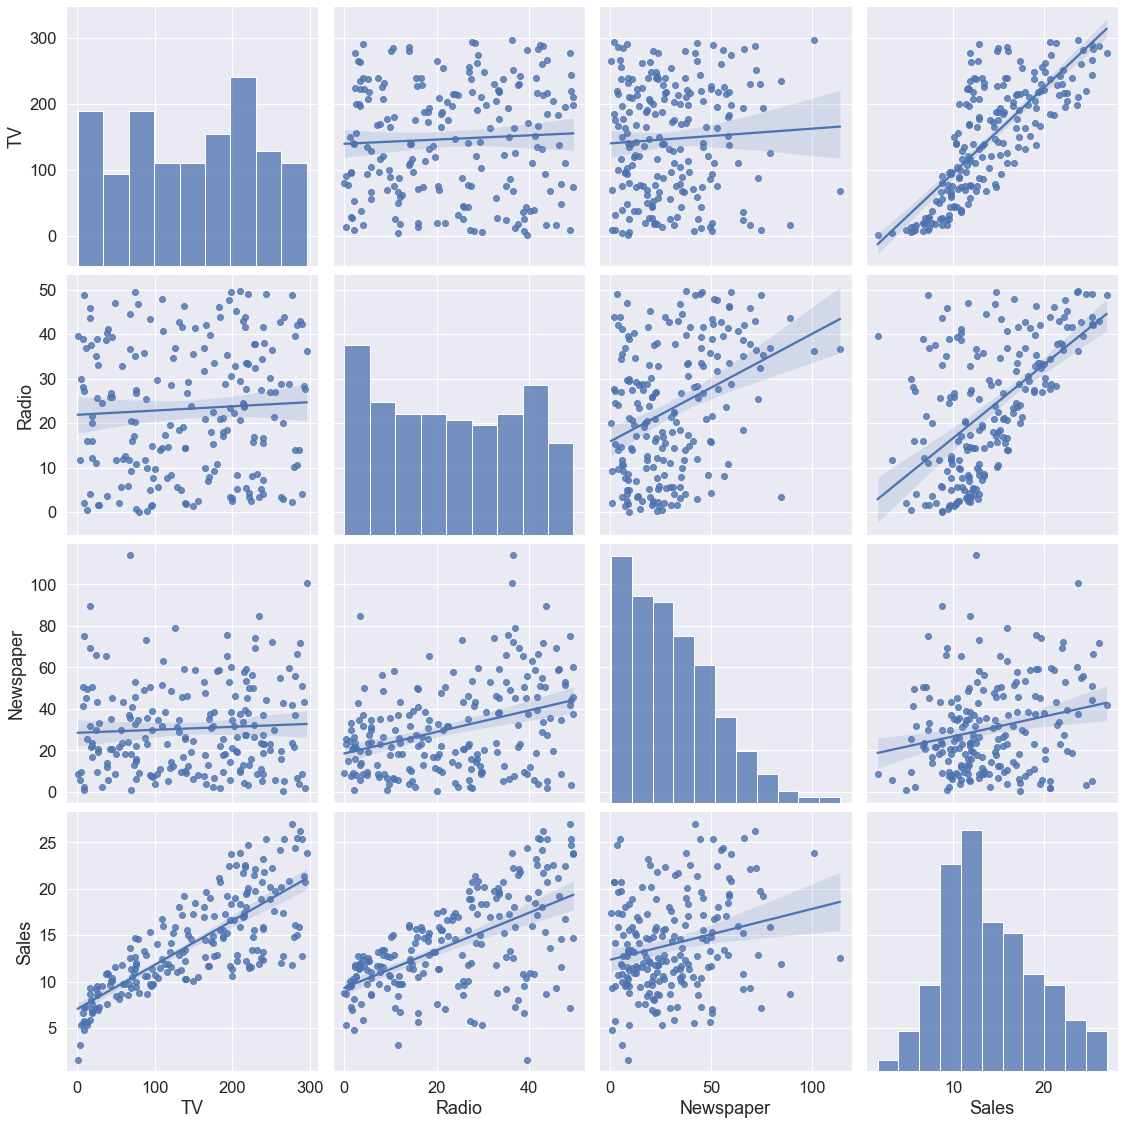

In [33]:
sns.pairplot(adv, kind="reg", height=4)

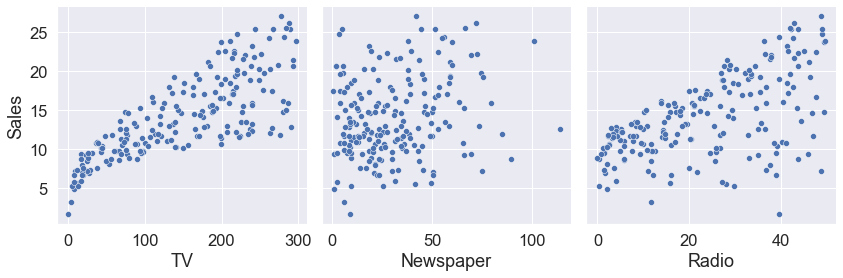

In [34]:
sns.pairplot(adv, x_vars=['TV', 'Newspaper', 'Radio'], y_vars=['Sales'], height=4)

# 상관관계 해석

In [36]:
# TV와 판매량 사이의 상관관계가 가장 높았다

# 변수 간 선형 관계 해석

In [35]:
# TV와 Sales의 관계를 선형으로 모델링할 수 있다는 것을 알 수 있다.
# TV 광고를 많이 할수록 판매량이 증가 (가장 많이 팔림)

# End